##### Hardship Index: The indicators are the percent of occupied housing units with more than one person per room (i.e., crowded housing); the percent of households living below the federal poverty level; the percent of persons in the labor force over the age of 16 years that are unemployed; the percent of persons over the age of 25 years without a high school diploma; the percent of the population under 18 or over 64 years of age (i.e., dependency); and per capita income.

In [15]:
# Dependencies and Setup
%matplotlib inline
from config import gkey
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import scipy.stats as st
import requests
import json
# Configure gmaps
gmaps.configure(api_key=gkey)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Files to Load
population = pd.read_csv("Resources/Census-Data-by-Chicago-Community-Area-2016.csv")
crime = pd.read_csv("Resources/Crimes_-_2001_to_present(2016).csv")
sociecn = pd.read_csv("Resources/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv")
sociecn = sociecn[:-1]
sociecn['Community Area Number'] = sociecn['Community Area Number'].astype(int)
sociecn = sociecn.rename(columns = {'Community Area Number':'Community Area'})
sociecn

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [3]:
# Get crime counts and grouped by community

# ***FBI code specifies the crime type, consider if need to use***

crime = crime[['Ward', 'Community Area']]
group_community = crime.groupby(['Community Area'], as_index=False)
crime_group = group_community.count()
crime_group = crime_group.rename(columns = {'Ward':'Crime Count'})
crime_group.head()

,Community Area,Crime Count
0,1,869
1,2,868
2,3,847
3,4,525
4,5,376


In [4]:
# Merge datasets
combine = crime_group.merge(sociecn, on = 'Community Area', how = 'outer')\
.merge(population, on = 'Community Area', how = 'outer')
combine = combine.drop(columns = 'COMMUNITY AREA NAME')
combine = combine.reindex(sorted(combine.columns), axis=1)
combine

,Community,Community Area,Crime Count,HARDSHIP INDEX,PER CAPITA INCOME,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT OF HOUSING CROWDED,population
0,Rogers Park,1,869,39.0,23939,8.7,18.2,27.5,23.6,7.7,54402
1,West Ridge,2,868,46.0,23040,8.8,20.8,38.5,17.2,7.8,72211
2,Uptown,3,847,20.0,35787,8.9,11.8,22.2,24.0,3.8,55137
3,Lincoln Square,4,525,17.0,37524,8.2,13.4,25.5,10.9,3.4,40761
4,North Center,5,376,6.0,57123,5.2,4.5,26.2,7.5,0.3,34623
5,Lake View,6,1507,5.0,60058,4.7,2.6,17.0,11.4,1.1,98212
6,Lincoln Park,7,1074,2.0,71551,5.1,3.6,21.5,12.3,0.8,66959
7,Near North Side,8,2692,1.0,88669,7.0,2.5,22.6,12.9,1.9,89465
8,Edison Park,9,76,8.0,40959,6.5,7.4,35.3,3.3,1.1,11356
9,Norwood Park,10,337,21.0,32875,9.0,11.5,39.5,5.4,2.0,36083


In [5]:
# Adjusting crime by population
combine['Crime Count Adjusted'] = combine['Crime Count'] / combine['population']
combine

,Community,Community Area,Crime Count,HARDSHIP INDEX,PER CAPITA INCOME,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT OF HOUSING CROWDED,population,Crime Count Adjusted
0,Rogers Park,1,869,39.0,23939,8.7,18.2,27.5,23.6,7.7,54402,0.015974
1,West Ridge,2,868,46.0,23040,8.8,20.8,38.5,17.2,7.8,72211,0.012020
2,Uptown,3,847,20.0,35787,8.9,11.8,22.2,24.0,3.8,55137,0.015362
3,Lincoln Square,4,525,17.0,37524,8.2,13.4,25.5,10.9,3.4,40761,0.012880
4,North Center,5,376,6.0,57123,5.2,4.5,26.2,7.5,0.3,34623,0.010860
5,Lake View,6,1507,5.0,60058,4.7,2.6,17.0,11.4,1.1,98212,0.015344
6,Lincoln Park,7,1074,2.0,71551,5.1,3.6,21.5,12.3,0.8,66959,0.016040
7,Near North Side,8,2692,1.0,88669,7.0,2.5,22.6,12.9,1.9,89465,0.030090
8,Edison Park,9,76,8.0,40959,6.5,7.4,35.3,3.3,1.1,11356,0.006692
9,Norwood Park,10,337,21.0,32875,9.0,11.5,39.5,5.4,2.0,36083,0.009340


The correlation between both factors is 0.71


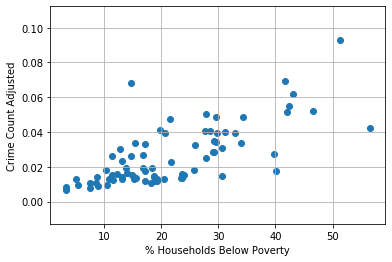

In [39]:
# Get correlations and scatter plot
correlation = st.pearsonr(combine.iloc[:, 8], combine['Crime Count Adjusted'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.scatter(combine.iloc[:, 8], combine['Crime Count Adjusted'])
plt.xlabel('% Households Below Poverty')
plt.ylabel('Crime Count Adjusted')
plt.grid()
plt.show()

In [8]:
# getting df for heatmap
community_lnglat = combine[['Community', 'Community Area']]
# Add columns for lat, lng, airport name, airport address, airport rating
# Note that we used "" to specify initial entry.
community_lnglat["Lat"] = ""
community_lnglat["Lng"] = ""
community_lnglat.head()

,Community,Community Area,Lat,Lng
0,Rogers Park,1,,
1,West Ridge,2,,
2,Uptown,3,,
3,Lincoln Square,4,,
4,North Center,5,,


In [10]:
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}

# Loop through the cities_pd and run a lat/long search for each city
for index, row in community_lnglat.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    community = row['Community']

    # update address key value
    params['address'] = f"{community},Chicago,Illinois"

    # make request
    communities_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    communities_lat_lng = communities_lat_lng.json()

    community_lnglat.loc[index, "Lat"] = communities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    community_lnglat.loc[index, "Lng"] = communities_lat_lng["results"][0]["geometry"]["location"]["lng"]

# Visualize to confirm lat lng appear
community_lnglat.head()

,Community,Community Area,Lat,Lng
0,Rogers Park,1,42.0106,-87.6696
1,West Ridge,2,42.0006,-87.6926
2,Uptown,3,41.9665,-87.6533
3,Lincoln Square,4,41.9687,-87.689
4,North Center,5,41.9467,-87.6883


In [13]:
# Store latitude, longitude, and weights
locations = community_lnglat[['Lat', 'Lng']]
poverty = combine.iloc[:, 8]

In [37]:
# Plot Heatmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = poverty,
                                 dissipating=False, max_intensity=28,
                                 point_radius = 0.016
)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))